# Project 1- Visualization of Microsoft and Netflix Stock Prices

This project visualizes the historic stock prices of Netflix and Microsoft


In [2]:
# Setup dataframes for use

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

# Create the two dataframes and clean the frames up for my use case
microDF = pd.read_csv('MicrosoftDataset.csv')           # Create a Dataframe from MicrosoftDataset.csv
microDF['Date'] = pd.to_datetime(microDF['Date'])       # Turn the Date column to pandas datetime
microDF.set_index('Date', inplace = True)               # Set the index to the Date column
microDF.drop(columns = 'Adj Close', inplace = True)     # Drop the Adj Close column becuase it is not needed for my use case

netDF = pd.read_csv('NetflixDataset.csv')               # Create a Dataframe from NetflixDataset.csv
netDF['Date'] = pd.to_datetime(netDF['Date'])           # Turn the Date column to pandas datetime
netDF.set_index('Date', inplace = True)                 # Set the index to the Date column
netDF.drop(columns = 'Adj Close', inplace = True)       # Drop the Adj Close column becuase it is not needed for my use case


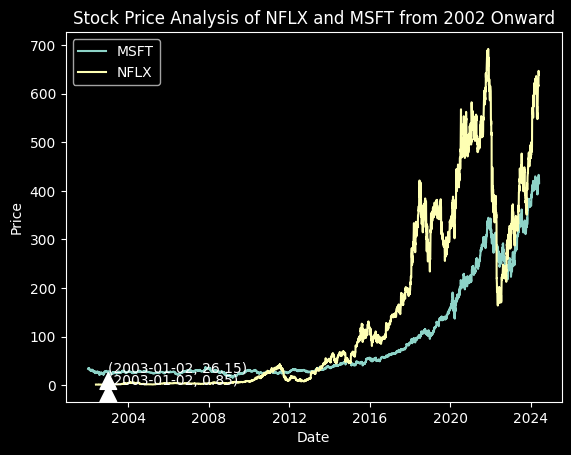

In [9]:
# Line plot
# Line plot to show basic open price movements

# Create Figure and axes
fig = plt.figure()
ax = plt.axes()

# Create DF from 2002 onward and create x, y cordinates for both lines
microDF2002 = microDF.loc['2002-01-01':]
netDF2002 = netDF.loc['2002-01-01':]
x1 = microDF2002.index
y1 = microDF2002['Open']
x2 = netDF2002.index
y2 = netDF2002['Open']

# Plot lines
plt.plot(x1, y1, label = 'MSFT')
plt.plot(x2, y2, label = 'NFLX')

# Label and legend for table
plt.title("Stock Price Analysis of NFLX and MSFT from 2002 Onward")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Annotations
annotationDate = pd.to_datetime('2003-01-02')
plt.annotate('(2003-01-02, 26.15)', xy = (annotationDate, 26.15),
             arrowprops=dict(facecolor='white', shrink=0.1))
plt.annotate('(2003-01-02, 0.85)', xy = (annotationDate, 0.85),
             arrowprops=dict(facecolor='white', shrink=0.1))

# Show plot
plt.show()

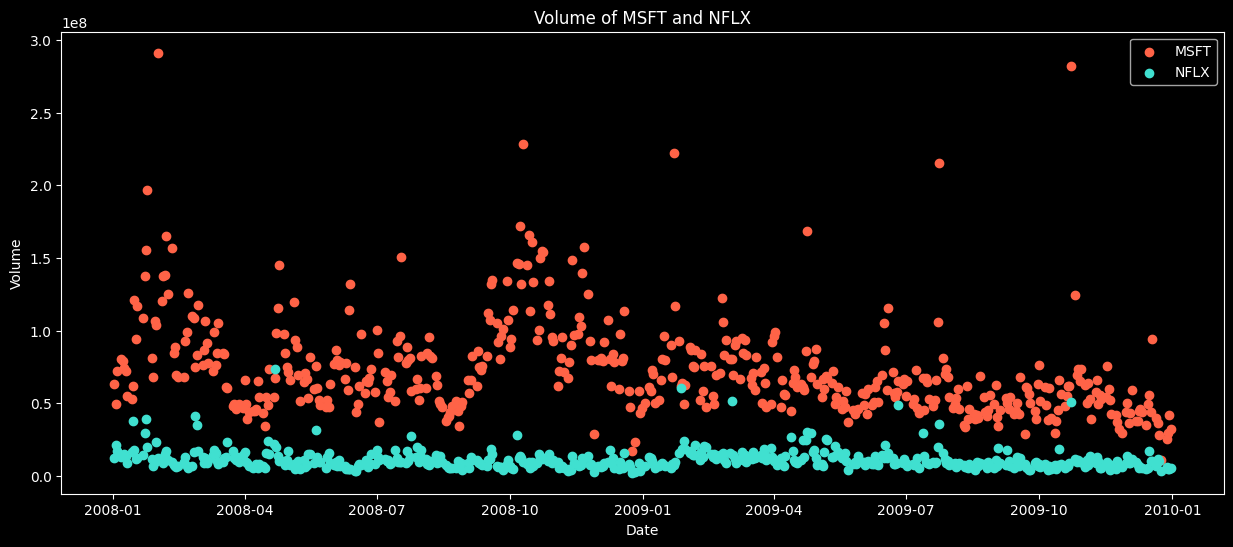

In [4]:
# Scatter Plot
# This scatter plot will show the volumes of both MSFT and NFLX from the year 2008 to 2010

# Slice DF
microDF2008_10 = microDF.loc['2008-01-01':'2010-01-01'].copy()
netDF2008_10 = netDF.loc['2008-01-01':'2010-01-01'].copy()

# Define x, y
x1 = microDF2008_10.index
y1 = microDF2008_10['Volume']

x2 = netDF2008_10.index
y2 = netDF2008_10['Volume']

# Plot
plt.figure(figsize = (15, 6))
plt.scatter(x1, y1, marker = 'o', color = 'tomato', label = 'MSFT')
plt.scatter(x2, y2, marker = 'o', color = 'turquoise', label = 'NFLX')

# Set up visuals
plt.legend()
plt.title("Volume of MSFT and NFLX")    # Insert a title
plt.xlabel("Date")                      # Label the x axis
plt.ylabel("Volume")                    # Label the y axis
plt.show()

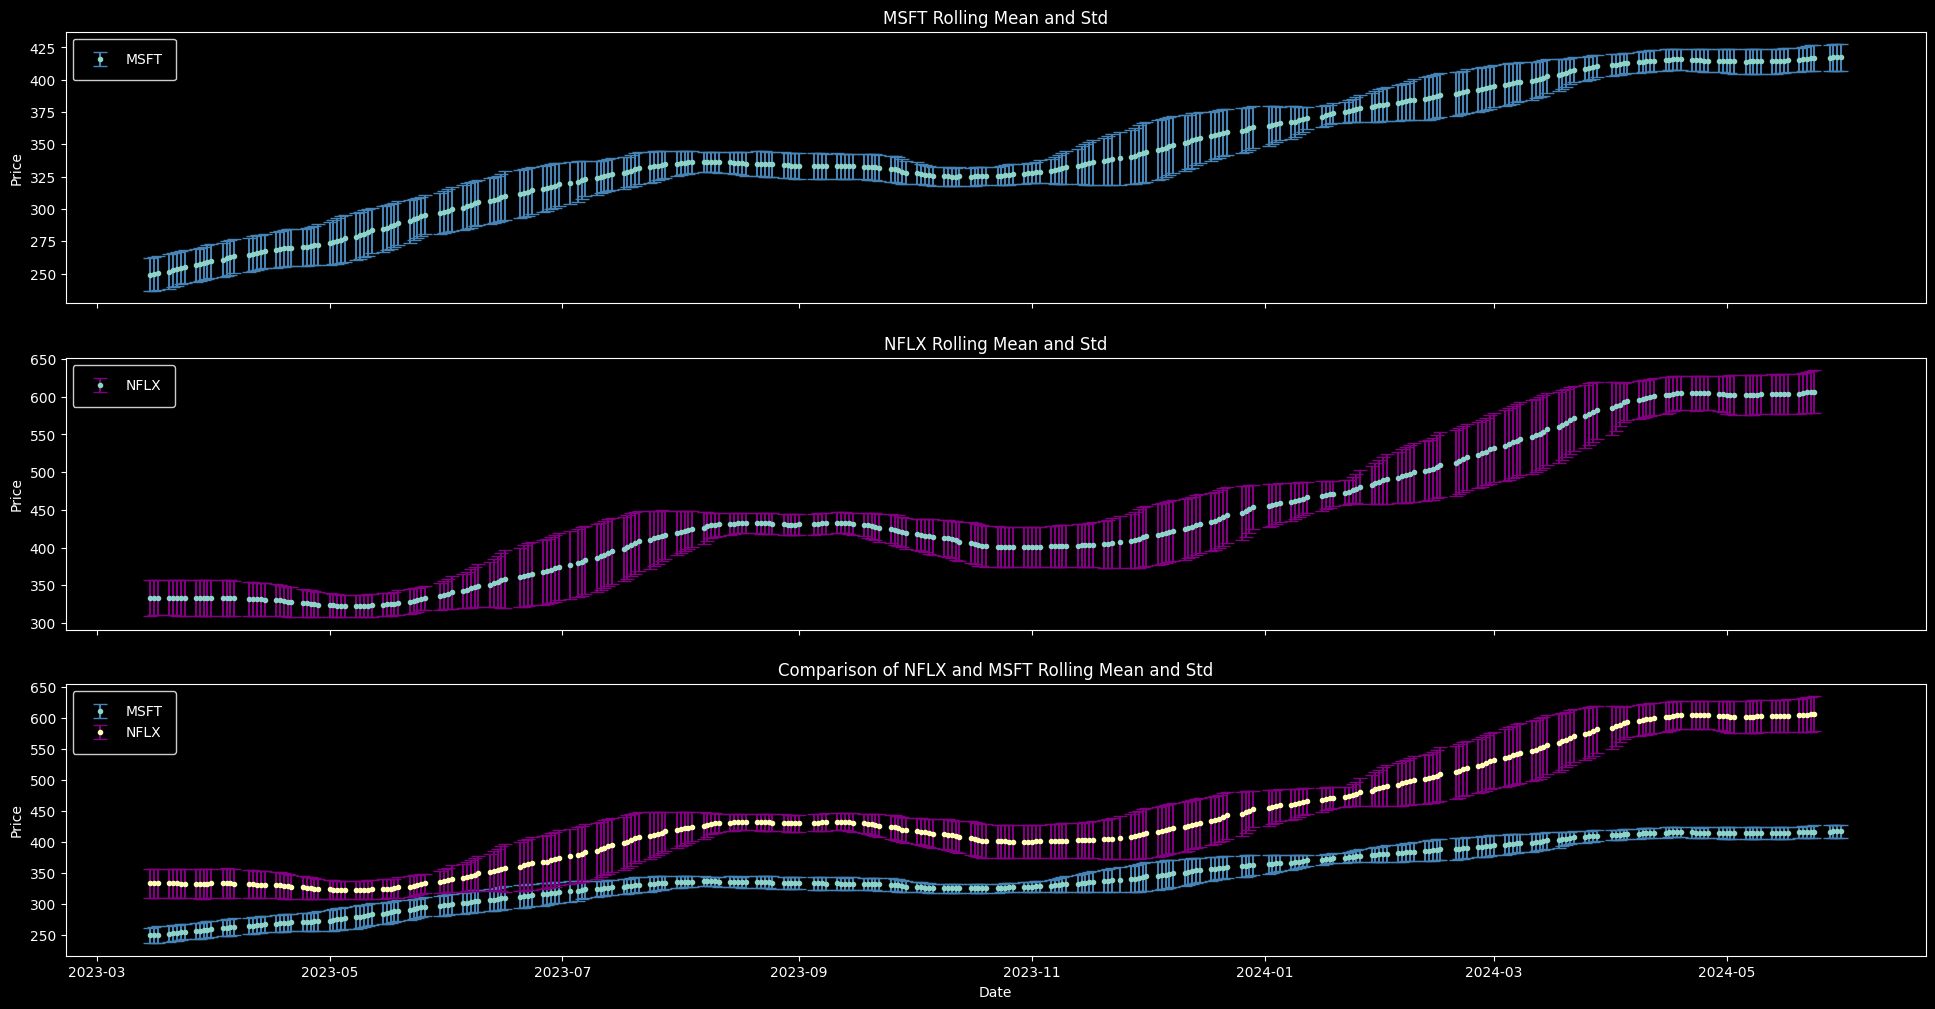

In [5]:
# Error Bar and Subplot
# The error bar plot will visualize the rolling mean with the rolling standard deviation as the error bars

# Create DF from 2015 onward
microDF2023 = microDF.loc['2023-01-01':].copy()
netDF2023 = netDF.loc['2023-01-01':].copy()

# Calculate rolling mean and standard deviation
microDF2023.loc[:, 'Rolling Mean'] = microDF2023.loc[:, 'Open'].rolling(window=50).mean()
microDF2023.loc[:, 'Rolling Std'] = microDF2023.loc[:, 'Open'].rolling(window=50).std()

netDF2023.loc[:, 'Rolling Mean'] = netDF2023.loc[:, 'Open'].rolling(window=50).mean()
netDF2023.loc[:, 'Rolling Std'] = netDF2023.loc[:, 'Open'].rolling(window=50).std()

# Create Plots
fig, ax = plt.subplots(3, 1, figsize=(24, 12), sharex = True)

# Plot the data and give a title
ax[0].errorbar(microDF2023.index, microDF2023['Rolling Mean'], 
            yerr=microDF2023['Rolling Std'], label='MSFT', fmt='.', capsize=5, ecolor = 'steelblue')
ax[0].set_title('MSFT Rolling Mean and Std')

ax[1].errorbar(netDF2023.index, netDF2023['Rolling Mean'], 
            yerr=netDF2023['Rolling Std'], label='NFLX', fmt='.', capsize=5, ecolor = 'purple')
ax[1].set_title('NFLX Rolling Mean and Std')

ax[2].errorbar(microDF2023.index, microDF2023['Rolling Mean'], 
            yerr=microDF2023['Rolling Std'], label='MSFT', fmt='.', capsize=5, ecolor = 'steelblue')
ax[2].errorbar(netDF2023.index, netDF2023['Rolling Mean'], 
            yerr=netDF2023['Rolling Std'], label='NFLX', fmt='.', capsize=5, ecolor = 'purple')
ax[2].set_title('Comparison of NFLX and MSFT Rolling Mean and Std')

# Add x, y labels and legends
ax[2].set_xlabel("Date")
for x in range(3):
    ax[x].legend(framealpha = 1, frameon = True,                    #Customizing Plot Legends
           fancybox = True, borderpad = 1, loc ='upper left')   
    ax[x].set_ylabel("Price")

plt.show()

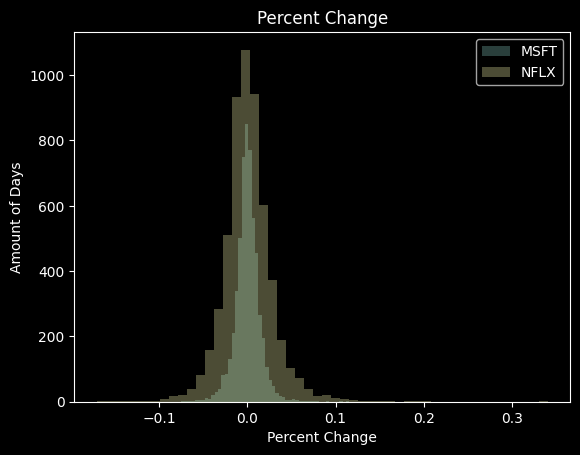

In [6]:
# Histogram

# Histogram will visualize the percent changes 

# Create DF from 2002 onward and create percent change column
microDF2002 = microDF.loc['2002-01-01':].copy()
microDF2002['percentChange'] = (microDF2002['Close'] - microDF2002['Open']) / microDF2002['Open']
netDF2002 = netDF.loc['2002-01-01':].copy()
netDF2002['percentChange'] = (netDF2002['Close'] - netDF2002['Open']) / netDF2002['Open']

# Create x axes
x1 = microDF2002['percentChange']
x2 = netDF2002['percentChange']
kwargs = dict(histtype = 'stepfilled', alpha = .3, bins = 50)

# Plot
plt.hist(x1, **kwargs, label = 'MSFT')
plt.hist(x2, **kwargs, label = 'NFLX')

# Label and legend for table
plt.title("Percent Change")
plt.xlabel("Percent Change")
plt.ylabel("Amount of Days")
plt.legend()

# Show plot
plt.show()